# <font color =#d14d0f>[ES-21AC] State Prisons and County Jails</font>
### Part One

***

### Professor: Victoria Robinson 
### Data Science Fellow: Phillip Pierini

The goal of this project is for students to understand that they can do social work using data. This notebook explores the incarceration trends and impacts of prison realignment in California.

*Estimated Time: 60 minutes*

---

### Table of Contents

[THE DATA](#sectiondata)<br>


[CONTEXT](#sectioncontext)<br>


[PRISONS](#section1)<br>
1. [DATA](#subsection1)<br> 
2. [DATA ANALYSIS](#subsection2)<br>
3. [GENERAL: DESIGNED & STAFFED CAPACITY](#subsection3)<br>
4. [GENDER DIVISION](#subsection4)<br>

## <font color =#d14d0f>Intro to Python and Jupyter Notebook</font> <a id='sectionpy'></a>

In [2]:
# This loads tools from the datascience library
from datascience import * 

# Loads numerical methods
import numpy as np 

# This will allow us to export your responses as a pdf
# from otter import Notebook 


# This loads some visualization tools
import matplotlib  
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# This selects a certain 'style' for our graphs


# Loads a widgets library that will allow for interactive learning
import ipywidgets as widgets 

## <font color =#d14d0f>The Data</font> <a id='sectiondata'></a>
---

Over the course of two online lectures, we will be working through two notebooks. This first one will inform you about state prisons and the second one will about county jails. 

In this notebook, you will use data from the CDCR (California Department of Corrections and Rehabilitation).

The CDCR reports the number of people in state prisons across California. In this data set, you will find information about the capacity (staff & design) of each prison and the current population. This will provide with a framework with which to understand prison overcrowding and the effectiveness of policy to reduce it. 

If you are interested in learning more please visit:

[CDCR data and infromation](https://github.com/nrjones8/cdcr-population-data)


## <font color =#d14d0f>Context</font>  <a id='sectioncontext'></a>
---

Throughout the course, we have learned about the policies of realignment, incarceration, and crime trends in California. By exploring this dataset we hope to get a clearer picture of the magnitude of prison and county jail overcrowding per facility and region, and the effects of realignment policies in state prisons and county jails.

The key difference between state prisons and jails involve the process of sentencing. Prisons are designed for long term sentences, while jails are for those who are unsentenced or have short term sentences. It is important to note that short-term sentences are generally one year or less. Another difference is that prisons are larger and controlled at the state level. In contrast, jails are smaller and handled by a city or county.

The relationship between the two institutions is emphasized by mass incarceration. Through this activity, we will analyze how overcrowding within California’s state prisons influenced the size of jail populations after realignment policies were implemented.

## <font color =#d14d0f>Prisons</font> <a id='section1'></a>
---

To observe how realignment influenced California's prisons and jails, we obtained data from 1996 to 2018, so that we could understand the trend over time. We will start by observing California's state prisons using the data we found through the CDCR (California Department of Corrections and Rehabilitation).

### **Data** <a id='subsection1'> </a>

#### Data Dictionary
Below you will find a data dictionary for future reference. This data dictionary goes over what the column names mean in the data we loaded previously.

|Column Name   | Description |
|--------------|---------|
|year |Year that the data was collected  |
|month | Month that the data was collected |
|institution_name |  Abbreviated Name of the State Prison|
|population_felons | People imprisoned for committing felony (serious or violent crime) |
|civil_addict | People imprisoned for drug related offenses |
|total_population | Sum of civil addict and population felons columns|
|designed_capacity | Max number of people the prison was built to hold|
|percent_occupied | Percentage of people incarcerated out of designed capacity|
|staffed_capacity | Max number of people the prison can hold based on the number of people employed|

We've already imported the data in a cell above, but let's take a look at it again. This time we'll sort it by year with the oldest years at the top.

In [5]:
prisons.sort('year').show(5)

NameError: name 'prisons' is not defined

### **Data Analysis** <a id='subsection2'> </a>

When processing a new data set, it is a good idea to play around with the data and try to combine it in different ways. To start it's good to think about how many times we expect each prison to occur in our dataset, and how many times they **actually** appear.

Our dataset is made up of prisons in California from the year 1996 to 2018. The counts in our data set were done monthly, meaning for each year we expect there to be at most 12 counts for each prison. Let's calculate the number of times we expect each prison to appear in a cell below.

In [45]:
months = 12
years = 2018 - 1996 + 1 # We add one to our calculation because we want to include 1996

months * years

276

By running the cell above you should see that we expect for there to be a maximum of 276 instances of each prison for the time period we have in our data set. This amount is equivalent to an entry once a month for 23 years.

To find the number of times that each institution appears in our data set, we would have to group by the institution name. Essentially, we want our computer to make groups that only have values from the same prison. After we have made these groups, we can decide how to handle the data per group.

The code that corresponds to this is the table function `group()`. The `group()` function takes in a column name and puts all the similar values in that column into groups, then it counts the number of items in each group.

Then, we can use the `sort()` function to order the counts in a specific order.

In [4]:
# We choose to have the counts in descending order in the following example:
prisons.group("institution_name").sort("count", descending = True).show()

NameError: name 'prisons' is not defined

<font color = #d14d0f>**QUESTION 2**:</font> What do we notice from this table? You should notice that there are values in our table that do not correlate with what we calculated above. Remember that we expect each prison to appear at most 276 times.

*Replace this text with your response!*

The cases where we have counts greater than 276 should interest you. If we assume that some of these counts are due to multiple entries per month, why would a prison need to do this? What is the significance of these counts, meaning what makes one count in a month different from the other count in that same month?

To understand why we have different counts, we will look into these special prisons. Thus, the prisons we will observe in the rest of this section are:
- Valley State Prison (VSP)
- Sierra Conservation Center (SCC)
- Los Angeles County State Prison (LAC)

In the following section, we will explain what we think is the cause of "inconsistency" in the data, and how we decided to handle it. Then, we will read a data table with the "cleaned" data using `Table().read_table()` and assign it to a new variable.

Though we denoted them as "inconsistencies", we urge you not to look at this as mistakes in the data but try to think how they fit into the major issues we have learned about in the class.

#### Valley State Prison

From outside research, we discovered that Valley State Prison changed from a female prison to a male prison in 2012 -- October of 2012 to be exact. However, all rows are labeled as a male institution. For future analysis, it would be better to separate VSP into its corresponding female and male years. Thus, we decided to split and relabeled the VSP data into male and female parts. The code for this process is not shown but we have cleaned the data and are reading it as a new table below!

In [7]:
prisons_1 = Table().read_table("prisons1.csv")
prisons_1.where('institution_name', are.containing("VALLEY SP (")).show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VALLEY SP (FEMALE),2294,0,2294,1980,115.9,1980
34,1996,2,VALLEY SP (FEMALE),2096,0,2096,1980,105.9,2184
68,1996,3,VALLEY SP (FEMALE),2326,7,2333,2380,98,2584
102,1996,4,VALLEY SP (FEMALE),2498,13,2511,2380,105.5,2584
136,1996,5,VALLEY SP (FEMALE),2562,9,2571,2380,108,2584


#### Sierra Conservation Center (SCC)

For the Sierra Conservation Center, there were many double counts for each month. When we researched why there were separate counts for the same prison, it was unclear. One count had values in the thousands, while the other count was in the hundreds. Our best guess is that the prison counted the number of people within a fire camp nearby. We split and relabeled our data to show the difference between the smaller and larger population. Once again the code for this process is not shown but we read it in as a new table.

In [8]:
prisons_2 = Table().read_table("prisons2.csv")
prisons_2.where('institution_name', are.containing("SIERRA")).show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
7,1996,1,SIERRA CONSERVATION CENTER (PRISON),6010,0,6010,3606,166.7,5884
41,1996,2,SIERRA CONSERVATION CENTER (PRISON),5912,0,5912,3606,163.9,5884
75,1996,3,SIERRA CONSERVATION CENTER (PRISON),5912,0,5912,3606,163.9,5884
109,1996,4,SIERRA CONSERVATION CENTER (PRISON),5979,0,5979,3606,165.8,5884
143,1996,5,SIERRA CONSERVATION CENTER (PRISON),5884,0,5884,3606,163.2,5884


#### Los Angeles County State Prison (LAC)

In the case of Los Angeles County prison, we saw that from December 2005 to June 2006 there was a double count recorded for the prison population. Although we are unsure what caused the differences between the two groups, we noted that one group had a population size ranging in the four thousands while the other group was in the range of less than one thousand. We split and relabeled the data to show the difference between the smaller and larger population.

<font color = #d14d0f>**QUESTION 3**:</font> Why might we want to use the difference between the two populations instead of just replacing the population with either count?

*Replace this text with your response!*

In [9]:
prisons_3 = Table().read_table("prisons3.csv")
prisons_3.where('institution_name', are.containing("LOS")).show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
23,1996,1,LOS ANGELES COUNTY (STATE PRISON),3978,0,3978,2200,180.8,4000
57,1996,2,LOS ANGELES COUNTY (STATE PRISON),3919,0,3919,2200,178.1,4000
91,1996,3,LOS ANGELES COUNTY (STATE PRISON),3975,0,3975,2200,180.7,4000
125,1996,4,LOS ANGELES COUNTY (STATE PRISON),4064,0,4064,2200,184.7,4000
160,1996,5,LOS ANGELES COUNTY (STATE PRISON),4012,0,4012,2200,182.4,4000


### **General: Designed & Staffed Capacity** <a id='subsection3'> </a>

#### Designed Capacity of California's Prisons Over Time

**Context**: The Prison Industrial Complex has created our current issue with mass incarceration. Throughout the course, you have learned how prisons are designed to hold large numbers of people, and how creating these large institutions perpetuates the cycle of mass incarceration because these prisons are made with the intent to be filled.

In this next section, we will break down how the designed capacity of prisons is related to the actual population within a given institution. We will later compare the total population with the number of people employed to sustain this system.

**Data Cleaning**: We will be looking at the trends in prison population over time. For this purpose it is not necessary to view all the columns of our table so we will use another table function, `select()` to cut out the unnecessary columns. We will be keeping `year`, `institution_name`, and `designed_capacity`. In order to use this table in the future, we will assign it to a new variable called `year_and_design_capacity`.

Before we continue, please note that for the remainder of this notebook, we will use an updated version of the `prisons` table that includes the changes we made above. We call this updated table `prisons_updated`.

In [58]:
# Include the changes listed above
prisons_updated = prisons_3

# Select only the necessary columns and show the top 3
year_and_design_capacity = prisons_updated.select("year", "month","institution_name",'designed_capacity', "total_population")
year_and_design_capacity.show(3)

year,month,institution_name,designed_capacity,total_population
1996,1,NCWF (NO CAL WOMEN'S FACIL),400,790
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2004,2859
1996,1,"CRC (CAL REHAB CTR, WOMEN)",500,794


Now we want to see what is the `designed_capacity` for ALL the prisons in a given year. Remember that nifty `group()` function? We achieve our goal by grouping by year using the function `group()` and summing over all the prisons in that year. Since we are only interested in looking at designed capacity for all prisons, we can create a new table that only includes the `designed_capacity` and `year` columns. We do this by selecting the necessary columns just as we did above!

In [46]:
year_and_design_capacity.group("institution_name")
43* (2018 - 1996 + 1)

989

In [36]:
def last_inst(x):
    return x[-1]

In [59]:
correct_table = year_and_design_capacity.group(["year","institution_name"], last_inst)
correct_table

year,institution_name,month last_inst,designed_capacity last_inst,total_population last_inst
1996,ASP (AVENAL SP),12,2320,5787
1996,CAL (CALIPATRIA SP),12,2208,4145
1996,CCC (CA CORRECTIONAL CENTER),12,3682,5760
1996,CCI (CA CORRECTIONAL INSTITUTION),12,2781,5940
1996,CCWF (CENTRAL CA WOMEN'S FAC),12,2004,3147
1996,CEN (CENTINELA SP),12,1708,4367
1996,CIM (CA INSTITUTION FOR MEN),12,2778,5695
1996,CIW (CA INSTITUTION FOR WOMEN),12,1026,1706
1996,CMC (CA MEN'S COLONY),12,3884,6395
1996,CMF (CA MEDICAL FAC),12,2315,3220


In [62]:
year_and_design_capacity.where("year", 1996).where("institution_name", "CMF (CA MEDICAL FAC)").show()

year,month,institution_name,designed_capacity,total_population
1996,1,CMF (CA MEDICAL FAC),2335,3081
1996,2,CMF (CA MEDICAL FAC),2335,3004
1996,3,CMF (CA MEDICAL FAC),2335,3092
1996,4,CMF (CA MEDICAL FAC),2335,3114
1996,5,CMF (CA MEDICAL FAC),2335,3148
1996,6,CMF (CA MEDICAL FAC),2315,3175
1996,7,CMF (CA MEDICAL FAC),2315,3158
1996,8,CMF (CA MEDICAL FAC),2315,3182
1996,9,CMF (CA MEDICAL FAC),2315,3117
1996,10,CMF (CA MEDICAL FAC),2315,3086


# SHOULD WE TAKE THE LAST MONTH/ FIRST MONTH AVERAGE TOTAL POP FOR YEAR AND /OR DESIGN CAPACITY??

In [51]:
design_capacity_ca = correct_table.select("designed_capacity last_inst", "year").group("year", sum)
design_capacity_ca.show(3)

year,designed_capacity last_inst sum
1996,73016
1997,76352
1998,79875


**Plotting**: Although it is possible to compare the values for designed capacity year by year and try to notice a pattern, often times it is more useful to visually inspect the information as it might reveal useful insights and provide a context for the data we are looking at.

Below we drew a line plot to reflect the changes in design capacity of California's state prisons over time.

In order to plot a trend of our data we will use a `plot()` function that takes in two inputs: `plot(x, y)`, where the `x` and `y` represent two column names that you would like to plot along the x and y axis respectively. We then append this to our table's name using dot notation. This tells the computer in which table to look for those columns.

To appropriately label our plot we can use `plt.xlabel('x_axis_name')` and `plt.ylabel('y_axis_name')` to label our axes and `plt.title('plot_title')` for our plot's main title. Notice that we didn't attach any particular table's name via dot notation. These are not table functions but basic plot functionalities from another Python library we loaded at the start of this notebook! In order for them to work, however, they must be run *after* you have created a plot. Take a look below!

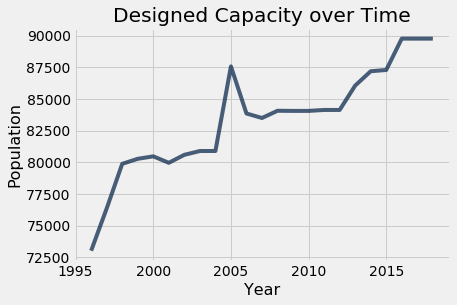

In [53]:
design_capacity_ca.plot("year", "designed_capacity last_inst sum")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Designed Capacity over Time"); # This semicolon is here for style purposes

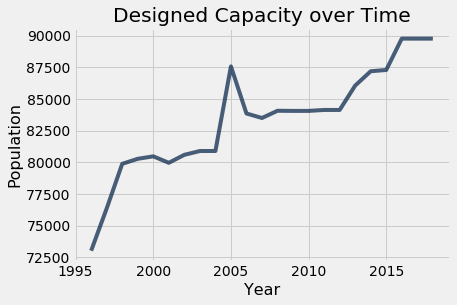

In [56]:
design_capacity_ca.plot("year", "designed_capacity last_inst sum")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Designed Capacity over Time"); # This semicolon is here for style purposes

We will focus on some years that mark important shifts as a result of realignment.

Let's look at the year 2011. To do this we will employ a new table function to select data only **where** the year is equal to 2011. This function is appropriately named the `where()` function and takes in two inputs: a column name and a year (in that order).

In [54]:
design_capacity_2011 = design_capacity_ca.where("year", 2011)
design_capacity_2011

year,designed_capacity last_inst sum
2011,84130


To emphasize this year and visualize it more easily on our trend line, we will run some code that will create a dot where the year equals 2011. Don't worry about the code used, but feel free to read through it if you're interested in seeing how we created this marker.

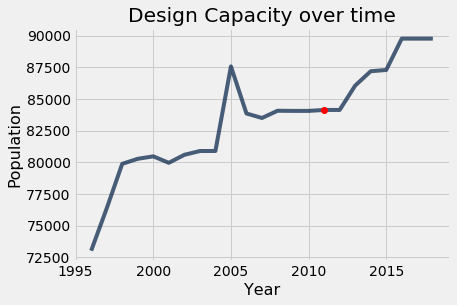

In [57]:
# Assign the year 2011 as the x-coordinate
x_coordinate_2011 = design_capacity_2011.column('year')

# Assign the designed capacity sum in the year 2011 as the y-coordinate
y_coordinate_2011 = design_capacity_2011.column("designed_capacity last_inst sum")

design_capacity_ca.plot("year", "designed_capacity last_inst sum"); # Plot our trend

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Design Capacity over time")

plt.plot(x_coordinate_2011, y_coordinate_2011, 'ro'); # Plot a single x,y coordinate

<font color = #d14d0f>**QUESTION 4**:</font> In looking at the graph produced, how does it reflect the systematic changes in California's potential prison population? In particular, name a court case that is related to the red marker in our graph.

*Replace this text with your response!*

<font color = #d14d0f>**QUESTION 5**:</font> Let's analyze our graph further; what do you think happened in 2006 that caused the spike we see?

*Replace this text with your response!*

#### Total Population in California's Prisons Over Time

**Context**: In the last section, we observed the change in the number of people California's prisons are designed to hold. Given this change over time, we wanted to compare it with the actual number of people within California's prisons and see how the two quantities correlated. To do this, we will calculate the percent for how full prisons were based on *how many people each prison is designed to hold*.

**Data Cleaning**: Once again, since we are interested in calculating prison population percentage based on design capacity, we need only a few columns from our `prisons_updated` table. We will select only `year`, `total_population`, and `designed_capacity`. We will call this new table `total_pop_and_design`.

In [15]:
total_pop_and_design = prisons_updated.select("year", "total_population", "designed_capacity")
total_pop_and_design.show(5)

year,total_population,designed_capacity
1996,790,400
1996,2859,2004
1996,794,500
1996,1726,1026
1996,4537,2484


Similar to our last investigation, we will want to group by year and sum both `total_population` and `designed_capacity` for all prisons given a year.

In [16]:
sum_total_and_design = total_pop_and_design.group("year", sum)
sum_total_and_design.show(5)

year,total_population sum,designed_capacity sum
1996,1623806,873676
1997,1739423,910797
1998,1788142,956740
1999,1818019,958881
2000,1820519,965721


Now that we have our information grouped by year and summed over all the prisons, we can begin calculating our percentage. To get this percentage we must first assign all of our `total_population` values to a variable and do the same for `designed_capacity`. Then we will divide the `total_population` values by their corresponding `designed_capacity` and multiply by 100 to get the population percentage.

In [17]:
total_population = sum_total_and_design.column("total_population sum") 
designed_sum = sum_total_and_design.column("designed_capacity sum")

capacity_percentage = (total_population / designed_sum) * 100
capacity_percentage

array([ 185.85905988,  190.97812136,  186.89947112,  189.59797931,
        188.51397039,  186.46297264,  186.17592316,  188.84950734,
        192.63564133,  190.09189001,  188.49532912,  195.52605312,
        190.30095205,  183.36618572,  178.73669545,  173.23535445,
        149.88321645,  144.95077023,  138.83530151,  132.72696534,
        131.7232109 ,  132.02795138,  131.94811151])

Note that our output seems to be a list of numbers, separated by commas. This is because for every row, this percentage was calculated, meaning we should have a list (or in Python, this is called an **array**) that is the same length as the number of rows in our table! The code that follows will add this list of percentages back into our table so that we may plot them. Do not worry about the code below, but feel free to take a look!

In [18]:
# Use .with_column() to add a new column with the percentages calculated above!
total_and_design_and_percentages_table = sum_total_and_design.with_column("Design Percent", capacity_percentage)

total_and_design_and_percentages_table.show(3)

year,total_population sum,designed_capacity sum,Design Percent
1996,1623806,873676,185.859
1997,1739423,910797,190.978
1998,1788142,956740,186.899


<font color = #d14d0f>**QUESTION 6**:</font> What can you immediately comment on by looking at the top three percentage values in our new column?

*Replace this text with your response!*

Now that we have our table set up correctly, we can plot how overcrowding has changed over time.

**Plotting**: Using the same methods as before, we will draw a line plot to reflect the trend in overcrowding in California state prisons over time.

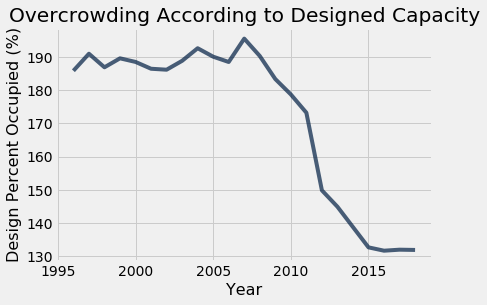

In [19]:
total_and_design_and_percentages_table.plot("year", "Design Percent")

plt.xlabel("Year")
plt.ylabel("Design Percent Occupied (%)")
plt.title("Overcrowding According to Designed Capacity");

<font color = #d14d0f>**QUESTION 7**:</font> What do you notice about this trend over time?

*Replace this text with your response!*

#### Staffed Capacity

We have now seen how prisons exceed the number of people allowed per designated space. Given the amount of overcrowding present in prisons, another key aspect we might want to investigate is the number of people employed to maintain this system. To visualize this, we will calculate the percentage of people within prisons given the amount of staff employed to maintain the prison.

Using the same methods as before, we will select and graph this information.

In [20]:
# Select only the necessary columns
total_pop_and_staff = prisons_updated.select("year", "total_population", "staffed_capacity")

# Group by year and sum all values for that year
pop_and_staff_sum = total_pop_and_staff.group("year", sum)

population_column = pop_and_staff_sum.column("total_population sum")
staff_capacity_column = pop_and_staff_sum.column("staffed_capacity sum")

staff_capacity_percentage = (population_column / staff_capacity_column)* 100

# Add a new column with our percentages
staff_and_total_percent_table = pop_and_staff_sum.with_column("Staff Percent", staff_capacity_percentage)
staff_and_total_percent_table.show(3)

year,total_population sum,staffed_capacity sum,Staff Percent
1996,1623806,1603264,101.281
1997,1739423,1713086,101.537
1998,1788142,1788475,99.9814


Now that we have our table set up nicely, we can begin the plotting process:

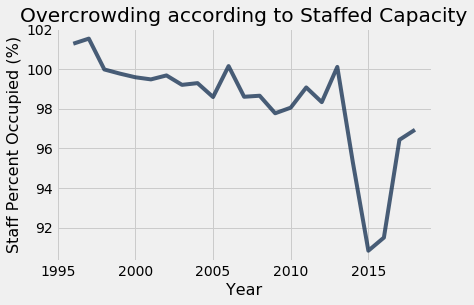

In [21]:
staff_and_total_percent_table.plot("year", "Staff Percent")

plt.xlabel("Year") 
plt.ylabel("Staff Percent Occupied (%)")
plt.title("Overcrowding according to Staffed Capacity");

<font color = #d14d0f>**QUESTION 8**:</font> What trends do you notice within the line plot?

*Replace this text with your response!*

#### Designed Capacity Versus Staff Capacity

In the last two examples, we saw how crowded prisons have been over time by looking at their designed capacity and staffed capacity. However, it is still unclear what the relationship between the two percentages is. The solution? Make another plot! This time we will include both of the percentages we calculated.

To do this, we will create a new table with three columns, namely 
* Year
* Design Percentage
* Staff Percentage

The code used to create this new table is shown below, however you are not required to know how to do this! But feel free to take a look.

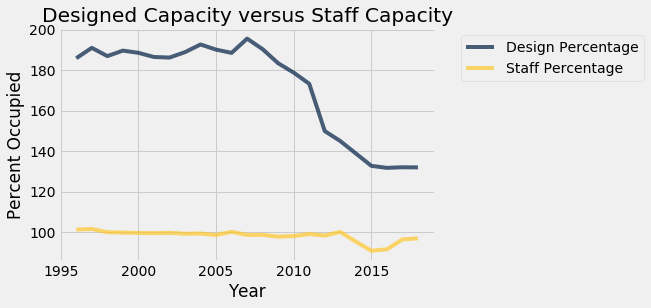

In [22]:
# Create a list/array of all the years we have data for
years = np.arange(1996, 2018 + 1) # We add 1 to include 2018

# Use our new years variable and capacity_percentage and staff_capacity_percentage
# from before as new columns in a new table called compare_table_design_and_staff
compare_table_design_and_staff = Table().with_columns(["year", years,
                                    "Design Percentage", capacity_percentage,
                                    "Staff Percentage", staff_capacity_percentage])

# Create a plot as before!
compare_table_design_and_staff.plot("year") # Notice that we only include one column

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity");

<font color = #d14d0f>**QUESTION 9:**</font> Consider the large gap between the two lines. Why is staff capacity much closer to 100% than designed capacity?

*Replace this text with your response!*

#### Interactive Widget

We have created an interactive widget for you in this section. In this example, you will be able to scroll through all of the prisons in California (numbered from 0 to 39, and you will see how the designed capacity versus population has changed over time.
<font color = #d14d0f>**Run the following cell to load the widget!**</font>

In [23]:
%run -i scripts.py
widgets.VBox([widgets.VBox([inp]), out])

ERROR:root:File `'scripts.py'` not found.


NameError: name 'inp' is not defined

<font color = #d14d0f>**QUESTION 10**:</font> Select any institution from the widget and analyze how that institution's designed capacity changed over time using the three highlighted points. Predict how the design capacity would compare with the staff capacity of that specific institution.

*Replace this text with your response!*

### **Gender Division** <a id='subsection4'></a>

**Context:** The system in place reinforces the idea that the average inmate holds certain characteristics. Since we have limited data sets we cannot investigate many aspects of this claim. However, in order to get a better understanding of the population that the prison industrial complex was made to hold, we will investigate a few variables such as gender divisions, design capacity, and staff capacity. 

Let's begin by looking at all the **unique** institutions on our dataset. To do this, we will use the `group()` function once again. The counts of the table below represent the number of months for which we have data given an institution. The maximum counts that any of the institutions *should* have is 276.

In [ ]:
prisons_updated.group("institution_name").show()

Since the data is made up of both male and female prisons, we will have to sort these prisons into separate groups before we can analyze them separately. However, we cannot ascertain whether a given institution is male or female-only given just the name. We had to double check whether an institution was male or female using sources outside of this notebook. 

One of the institutions that we found to be particularly interesting when looking at outside information was **VSP (VALLEY SP)**.

The California Department of Corrections and Rehabilitation began converting Valley State Prison into a facility for low-risk male inmates in October 2012, and it was completed by January 2013. Click [HERE](https://web.archive.org/web/20120111104018/http://cdcrtoday.blogspot.com/2011/12/cdcr-announces-plan-to-convert-female.html) or [HERE](https://www.cdcr.ca.gov/Facilities_Locator/VSP.html) to learn more. 

From these links you will learn that this conversion came as a result of realignment policies. We can noted earlier that the monthly count for this institution was above 276, which could indicate monthly counts for male and female inmates, leading to a double count. Though we addressed this issue before we began working with the data at the beginning of the notebook, running these sanity checks is important in order to not obtain misleading results.

#### Unique Female Prisons

In this section, we will organize the data corresponding to female institutions. In the cell below, we look only at the prisons which we know are strictly female. The following code creates a list or array of all the institutions we know to be strictly female.

Note that our now separated "Valley SP" institution is included.

In [ ]:
female_institutions = make_array("CCWF (CENTRAL CA WOMEN'S FAC)", 'CIW (CA INSTITUTION FOR WOMEN)',
       'CRC (CAL REHAB CTR, WOMEN)', 'FOL (FOLSOM SP) (FEMALE)',
       'FRCC (FRCCC BAKERSFIELD)', "NCWF (NO CAL WOMEN'S FACIL)", "VALLEY SP (FEMALE)")

**Filtering:** Now that we have a list of only the female serving institutions, we will create a new table in which only these select institutions are included. To do so, we will use a new table function for which you are not responsible. Take a look below!

In [ ]:
# Keep only the institutions in our list
female_data = prisons_updated.where("institution_name", are.contained_in(female_institutions))
female_data.show(3)

Now we will group by institution to learn about the number of times a given institution appears in our data set. Again this should be *at most* 276.

In [ ]:
female_prisons = female_data.group("institution_name")
female_prisons

#### Design Capacity Versus Staff Capacity for Female Institutions

Similar to the last sections, we will use the `select()` function to select necessary data in order to calculate the design versus staff capacities using our new `female_data` table.

In [ ]:
fem_year_pop_capacities = female_data.select("year", "total_population", "designed_capacity", "staffed_capacity")
fem_year_pop_capacities.show(3)

We want to combine all the values within the same year across all institutions, so we will use the `group()` function and sum.

In [ ]:
fem_year_groups = fem_year_pop_capacities.group("year", sum)
fem_year_groups.show(3)

Using the same techniques as in previous examples, we will calculate the designed capacity and staff capacity percentages.

In [ ]:
# Create a new variable with all the total population values
fem_total_population = fem_year_groups.column("total_population sum") 

# Calculate designed capacity percentages
fem_design_capacity = fem_year_groups.column("designed_capacity sum")
fem_design_percentage = (fem_total_population / fem_design_capacity) *100

# Calculate staff capacity percentages
fem_staff_capacity = fem_year_groups.column("staffed_capacity sum")
fem_staff_percentage =(fem_total_population / fem_staff_capacity)*100

In order to compare these two values with each other as we did before, we will want to add the percentages to a table. We could either create a new table, or add the percentages to our existing table and select only the necessary columns. Neither approach is more correct, but for readability's sake, we will create a new table below.

In [ ]:
fem_plot_table = Table().with_columns(
    "year", np.arange(1996, 2018+1),
    "Design Percent Occupied", fem_design_percentage,
    "Staff Percent Occupied", fem_staff_percentage)
fem_plot_table.show(3)

To plot both the Designed Percentage and the Staff Percentage, we will use the `plot()` function.

In [ ]:
fem_plot_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity");

#### Unique Male Prisons

Similar to our process in selecting only the female serving institutions, we will now repeat our analysis for male serving institutions. Another way to think about the filtering process is that we are excluding rows with female institutions.

Notice how instead of using a function called `are.contained_in()` we are using a function called `are.not_contained_in()`. In this way we skip the step where we make a list/array of only male serving prisons.

In [ ]:
male_data = prisons_updated.where("institution_name", are.not_contained_in(female_institutions))
male_data.show(3)

#### Design Capacity Versus Staff Capacity for Male Institutions

We want to analyze the designed and staff capacities over time, so we will once again use the `select()` function to get relevant data and group by year.

In [ ]:
male_grouped_year = male_data.select("year", "total_population", "designed_capacity", "staffed_capacity").group('year', sum)
male_grouped_year.show(3)

Let's repeat the same process as before, but with our male only data. If you would like to challenge yourself, try to recreate this process yourself! Feel free to create a new code cell below.

Otherwise, run the cell below.

In [ ]:
# Save total male population as new variable
male_total_population = male_grouped_year.column("total_population sum")

# Calculate design capacity percentage
male_design_capacity =  male_grouped_year.column("designed_capacity sum")
male_design_percentage = (male_total_population / male_design_capacity)* 100

# Calculate staff capacity percentage
male_staff_capacity =  male_grouped_year.column("staffed_capacity sum")
male_staff_percentage = (male_total_population / male_staff_capacity) *100

Just as in the female institution example, now we are adding both of these percentages to a new table.

In [ ]:
male_plot_table = Table().with_columns(
    "year", np.arange(1996, 2018+1),
    "Design Percent Occupied", male_design_percentage,
    "Staff Percent Occupied", male_staff_percentage)
male_plot_table.show(3)

Now let's plot it! You're starting to get the hang of this right?

In [ ]:
male_plot_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity");

#### Female vs Male Prisons: Designed and Staffed Capacities

Although we could compare the two plots side by side to contrast male and female institutions, it would be better to look at them on the same graph. We will set up the table to plot them together. Here are the two tables we used to draw the plots above.

In [ ]:
fem_plot_table.show(3)

In [ ]:
male_plot_table.show(3)

Before we merge the two tables, we will want to differentiate between the `Design Percent Occupied` column in the female table versus in the male table. Same with the staff percentage column. To do this, we will relabel the column names. The function that will relabel to the column names is called `relabel()`. The function takes in two inputs: the old column name and a new column name.

In [ ]:
male_design_relabeled = male_plot_table.relabeled("Design Percent Occupied", "Male Designed Percentage")
male_relabeled = male_design_relabeled.relabeled("Staff Percent Occupied", "Male Staffed Percentage")

male_relabeled.show(3)

In [ ]:
fem_design_relabeled = fem_plot_table.relabeled("Design Percent Occupied", "Female Designed Percentage")
fem_relabeled = fem_design_relabeled.relabeled("Staff Percent Occupied", "Female Staffed Percentage")

fem_relabeled.show(3)

Now that we have distinct design and staff capacities for male and female groups, we can match the values by year. They contain information over the same years. To combine tables, we use a function called `join()`. The format for the function is:
- *data_table_one*`.join(` *same_column*, *data_table_two*`)` where same_column is the name of the column that appears in both tables.

In [ ]:
male_and_female_table = male_relabeled.join("year", fem_relabeled)
male_and_female_table.show(3)

Amazing! Now we can begin to do some comparative analysis on the two types of institutions. In the cells below we will generate some graphs to compare designed capacity between male and female prisons as well as staff capacity between the two.

#### Designed Capacity: Male vs Female

In [ ]:
# Select only the design capacity columns from our previous table
select_design = male_and_female_table.select("year", "Male Designed Percentage", "Female Designed Percentage")

select_design.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male versus Female Designed Capacity");

#### Staffed Capacity: Male vs Female

In [ ]:
# Select only the staff capacity related columns from our table
select_staff = male_and_female_table.select("year", "Male Staffed Percentage", "Female Staffed Percentage")

select_staff.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male versus Female Staffed Capacity");

### Male Prisons vs Female Prisons in both Staff and Designed Capacity
Perhaps we'd like to view the differences in both staff and designed capacity between male and female prisons in the same graph. We do this in the cell below. Notice that the staff capacity graph seems to compress and the differences between the male and female prisons in staff capacity don't seem as great anymore. This has to do with the scale of our new graph.

In [ ]:
male_and_female_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons");

How does the combination of male and female institutions compare with the institutions overall (not separated between male and female)? To answer this question, let's look back towards the beginning of this notebook where we defined the table called `compare_table_design_and_staff` that compared designed and staff percentages by year that included both male and female institutions.

In [ ]:
compare_table_design_and_staff.show(3)

We want to combine the total percentages table above with the table that contains the percentages for male and female prisons separately. To combine the two tables, we will use the `join()` function again.

In [ ]:
all_joined = compare_table_design_and_staff.join("year", male_and_female_table)
all_joined.show(3)

In the following cell, we will select only the columns having to do with designed capacity percentages and plot them against each other. In the generated plot you should see both a total designed capacity percentage and both male and female designed capacity percentages.

In [ ]:
design_all = all_joined.select("year", "Design Percentage", "Male Designed Percentage", "Female Designed Percentage")
design_all.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons Designed Capacity");

Now we will repeat this process but for staff capacity percentages:

In [ ]:
staff_all = all_joined.select("year", "Staff Percentage", "Male Staffed Percentage", "Female Staffed Percentage")
staff_all.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons Staffed Capacity");

We're almost done! Now to view all this information on one graph.

In [ ]:
all_joined.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons");

<font color = #d14d0f>**QUESTION 11:**</font> 
Comment on the plot above. What are the differences between designed and staffed capacity? What are some patterns unique to female institutions? Why does the total population look almost identical to the male prisons percentages?

*Replace this text with your response!*

Thank you for taking the time to complete the first notebook! We hope you found it insightful. Lastly, run the cell below to output your responses as a pdf. There is no need to edit any of the code in the cell below, but make sure that you've run and completed your notebook!

Run all your cells by clicking "Cell" > "Run All" and save by either hitting the little floppy disk icon in your toolbar or clicking "File" > "Save and checkpoint"!

In [ ]:
Notebook.export("Lecture_1.ipynb", filter_type="tags")

If clicking the link above doesn't work for you, don't worry! Simply right click and choose "Save Link As..." to save a copy of your pdf onto your computer.

---
Notebook developed by: Ashley Quiterio, Shalini Kunapuli, Alma Pineda, and William McEachen

Data Science Modules: http://data.berkeley.edu/education/modules